In [4]:
from functools import partial

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("prepared_data.csv", index_col="SEQN").rename(
    {"any_caffeine.1": "any_caffeine_log"}, axis=1
)
df.head()

,knn_impute__bmi_total,knn_impute__demo_age,knn_impute__activity_sed_min,simple_impute__alcohol_nmbr_drinks,simple_impute__poverty_num,zero_impute__activity_vig_min,zero_impute__activity_mod_min,zero_impute__smoking_cigs_pd,static_impute__occ_hours_worked,passthrough__any_caffeine,passthrough__is_male,passthrough__any_caffeine_log,one_hot__demo_race_str_asian_non_hisp,one_hot__demo_race_str_black,one_hot__demo_race_str_hispanic_other,one_hot__demo_race_str_mexican_american,one_hot__demo_race_str_other_or_multi,kidney_had_stones,kidney_passed_stone,kidney_weak_failing
SEQN,,,,,,,,,,,,,,,,,,,,
109266,37.80,29.0,480.0,1.0,5.00,60.0,30.0,0.0,40.000000,25.0,False,3.258097,1.0,0.0,0.0,0.0,0.0,False,False,False
109267,22.68,21.0,540.0,2.0,5.00,90.0,0.0,0.0,40.000000,0.0,False,0.000000,0.0,0.0,1.0,0.0,0.0,False,False,False
109268,21.94,18.0,540.0,2.0,1.19,0.0,0.0,0.0,39.528287,0.0,False,0.000000,0.0,0.0,0.0,0.0,0.0,False,False,False
109271,29.70,49.0,60.0,2.0,1.20,0.0,0.0,20.0,39.528287,2087.5,True,7.644201,0.0,0.0,0.0,0.0,0.0,False,False,False
109273,21.90,36.0,180.0,2.0,0.53,0.0,120.0,15.0,28.000000,21.5,True,3.113515,0.0,0.0,0.0,0.0,0.0,False,False,False


{'fit_time': array([15.76876426, 14.87909937, 15.41579294, 14.70458436, 14.88189411,
       15.10979462, 14.79240036, 14.76836324, 14.71928906, 15.43744421]), 'score_time': array([0.50263309, 0.48428559, 0.69399548, 0.48634624, 0.61667633,
       0.47392178, 0.6189158 , 0.47896051, 0.47231317, 0.48843527]), 'test_accuracy': array([0.91030928, 0.91030928, 0.90927835, 0.90918473, 0.91124871,
       0.91124871, 0.91124871, 0.91021672, 0.91021672, 0.91021672]), 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_roc_auc': array([0.593067  , 0.67248539, 0.62877989, 0.62548395, 0.5932142 ,
       0.62942795, 0.66722194, 0.6309198 , 0.60612636, 0.69307608]), 'train_roc_auc': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

cv accuracy: 0.9103477918568403
cv auc score: 0.6339802566492261


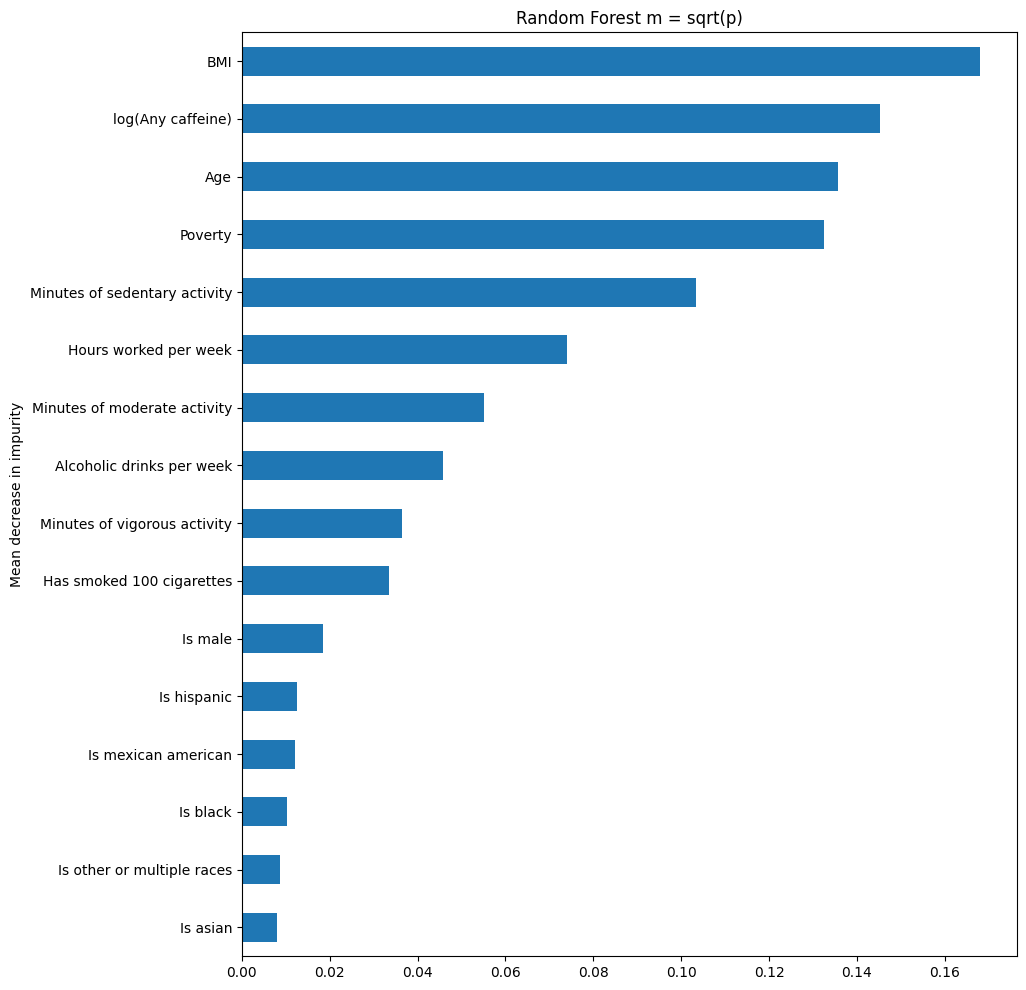

In [6]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(n_estimators=1000, max_features = "sqrt", random_state=0, oob_score=True)
#print(df)
train_data_X = df.loc[:,[
        "knn_impute__bmi_total",
        "knn_impute__demo_age",
        "knn_impute__activity_sed_min",
        "simple_impute__alcohol_nmbr_drinks",
        "simple_impute__poverty_num",
        "zero_impute__activity_vig_min",
        "zero_impute__activity_mod_min",
        "zero_impute__smoking_cigs_pd",
        "static_impute__occ_hours_worked",
        #"passthrough__any_caffeine",
        "passthrough__is_male",
        "passthrough__any_caffeine_log",
        "one_hot__demo_race_str_asian_non_hisp",
        "one_hot__demo_race_str_black",
        "one_hot__demo_race_str_hispanic_other",
        "one_hot__demo_race_str_mexican_american",
        "one_hot__demo_race_str_other_or_multi",
        "kidney_had_stones",
        #"kidney_passed_stone",
        #"kidney_weak_failing"
    ]
]

column_map = {
        "knn_impute__bmi_total":"BMI",
        "knn_impute__demo_age":"Age",
        "knn_impute__activity_sed_min":"Minutes of sedentary activity",
        "simple_impute__alcohol_nmbr_drinks":"Alcoholic drinks per week",
        "simple_impute__poverty_num":"Poverty",
        "zero_impute__activity_vig_min":"Minutes of vigorous activity",
        "zero_impute__activity_mod_min":"Minutes of moderate activity",
        "zero_impute__smoking_cigs_pd":"Has smoked 100 cigarettes",
        "static_impute__occ_hours_worked":"Hours worked per week",
        #"passthrough__any_caffeine",
        "passthrough__is_male":"Is male",
        "passthrough__any_caffeine_log":"log(Any caffeine)",
        "one_hot__demo_race_str_asian_non_hisp":"Is asian",
        "one_hot__demo_race_str_black":"Is black",
        "one_hot__demo_race_str_hispanic_other":"Is hispanic",
        "one_hot__demo_race_str_mexican_american":"Is mexican american",
        "one_hot__demo_race_str_other_or_multi":"Is other or multiple races",
        "kidney_had_stones":"kidney_had_stones",
}

train_data_X = train_data_X.rename(column_map, axis=1)
train_data_Y = train_data_X.pop("kidney_had_stones")


cv_data = cross_validate(rfc, train_data_X, train_data_Y, cv=10, scoring=['accuracy', 'roc_auc'], return_train_score=True)

print(cv_data)
print("")
print("cv accuracy: " + str(np.mean(cv_data["test_accuracy"])))
print("cv auc score: " + str(np.mean(cv_data["test_roc_auc"])))

rfc.fit(train_data_X, train_data_Y)

importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index = rfc.feature_names_in_)

plt.figure(figsize=(10,12))
forest_importances.sort_values(ascending = True).plot.barh()
plt.title("Random Forest m = sqrt(p)")
plt.ylabel("Mean decrease in impurity")
plt.show()